In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import datetime as dt

In [14]:
infopreco_df = pd.read_csv('/home/andrejucovski/Documentos/Mineração de Dados Biológicos/MD_Bio/infopreco_dataframe_base')

In [15]:
infopreco_df = infopreco_df.drop(['Unnamed: 0','DATA CADASTRO'], axis=1)

In [16]:
infopreco_df

,BAIRRO,MUNICÍPIO,UF,PRODUTO,VALOR VENDA,ACESSO,MES,TRIMESTRE,ANO,DIA,SEMANA
0,CENTRO,TRES LAGOAS,MS,Gasolina C Comum,4.436,AVENIDA,6,2,2018,28,26
1,CENTRO,TRES LAGOAS,MS,Etanol,3.482,AVENIDA,6,2,2018,28,26
2,CENTRO,TRES LAGOAS,MS,Diesel S500,3.644,AVENIDA,6,2,2018,28,26
3,CENTRO,TRES LAGOAS,MS,Diesel S10,3.734,AVENIDA,6,2,2018,28,26
4,ZONA RURAL,COXIM,MS,Gasolina C Comum,4.349,RODOVIA,12,4,2018,9,49
...,...,...,...,...,...,...,...,...,...,...,...
988,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S500,3.327,AVENIDA,6,2,2018,29,26
989,VILA BATISTA,CACAPAVA DO SUL,RS,Diesel S10,3.394,AVENIDA,6,2,2018,29,26
990,CENTRO,VIAMAO,RS,Gasolina C Comum,4.399,RUA,10,4,2019,14,42
991,CENTRO,VIAMAO,RS,Diesel S500,3.400,RUA,10,4,2019,14,42


In [17]:
infopreco_df_dm = pd.get_dummies(infopreco_df)

In [18]:
infopreco_df_dm

,VALOR VENDA,MES,TRIMESTRE,ANO,DIA,SEMANA,BAIRRO_AEROCLUBE,BAIRRO_AEROPORTO,BAIRRO_AGUAS CLARAS,BAIRRO_AMAMBAI,...,ACESSO_FAZENDA,ACESSO_LINHA,ACESSO_LOTE,ACESSO_PRACA,ACESSO_QUADRA,ACESSO_RODOVIA,ACESSO_RUA,ACESSO_SERVIDAO,ACESSO_SETOR,ACESSO_VIA
0,4.436,6,2,2018,28,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.482,6,2,2018,28,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.644,6,2,2018,28,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.734,6,2,2018,28,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.349,12,4,2018,9,49,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,3.327,6,2,2018,29,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
989,3.394,6,2,2018,29,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
990,4.399,10,4,2019,14,42,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
991,3.400,10,4,2019,14,42,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
%matplotlib inline
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression, SGDRegressor
from scipy.stats import uniform
from sklearn.metrics import accuracy_score

In [21]:
X = infopreco_df_dm.drop('VALOR VENDA', axis=1).values
y = infopreco_df_dm['VALOR VENDA'].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=19)

In [23]:
pipe1 = make_pipeline(StandardScaler(), 
                      SGDRegressor())
pipe2 = make_pipeline(MinMaxScaler(), 
                      SGDRegressor())
pipe3 = make_pipeline(RobustScaler(), 
                      SGDRegressor())
score1 = []
score2 = []
score3 = []

In [24]:
param_dist = {'sgdregressor__penalty' : ['l2', 'l1', 'elasticnet'],
              'sgdregressor__max_iter' : [1000, 1500, 2000, 2500],
              'sgdregressor__alpha' : uniform(loc=0.0, scale=1.0),
              'sgdregressor__l1_ratio' : uniform(loc=0.0, scale=1.0),
              'sgdregressor__learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}

In [25]:
search_pipe1 = RandomizedSearchCV(pipe1,param_distributions=param_dist, n_iter=50, n_jobs=-1, scoring='neg_mean_absolute_error', cv=5)
search_pipe2 = RandomizedSearchCV(pipe2,param_distributions=param_dist, n_iter=50, n_jobs=-1, scoring='neg_mean_absolute_error', cv=5)
search_pipe3 = RandomizedSearchCV(pipe3,param_distributions=param_dist, n_iter=50, n_jobs=-1, scoring='neg_mean_absolute_error', cv=5)

In [26]:
search_pipe1.fit(X_train, y_train)
search_pipe2.fit(X_train, y_train)
search_pipe3.fit(X_train, y_train)
print(search_pipe1.best_params_)
print(search_pipe2.best_params_)
print(search_pipe3.best_params_)

{'sgdregressor__alpha': 0.02547362772304207, 'sgdregressor__l1_ratio': 0.410153572977894, 'sgdregressor__learning_rate': 'invscaling', 'sgdregressor__max_iter': 1000, 'sgdregressor__penalty': 'l1'}
{'sgdregressor__alpha': 0.028077232998448554, 'sgdregressor__l1_ratio': 0.8258921701993658, 'sgdregressor__learning_rate': 'adaptive', 'sgdregressor__max_iter': 1500, 'sgdregressor__penalty': 'l2'}
{'sgdregressor__alpha': 0.059354573716917214, 'sgdregressor__l1_ratio': 0.2596027226801465, 'sgdregressor__learning_rate': 'adaptive', 'sgdregressor__max_iter': 2000, 'sgdregressor__penalty': 'elasticnet'}


In [27]:
pred_search_pipe1 = search_pipe1.predict(X_test)
pred_search_pipe2 = search_pipe2.predict(X_test)
pred_search_pipe3 = search_pipe3.predict(X_test)

In [28]:
print('RRMSE pipe1:',np.sqrt(np.sum((y_test-pred_search_pipe1)**2) / np.sum((y_test-y_test.mean())**2)))
print('RRMSE pipe2:',np.sqrt(np.sum((y_test-pred_search_pipe2)**2) / np.sum((y_test-y_test.mean())**2)))
print('RRMSE pipe3:',np.sqrt(np.sum((y_test-pred_search_pipe3)**2) / np.sum((y_test-y_test.mean())**2)))

RRMSE pipe1: 0.643659344864388
RRMSE pipe2: 0.5738809313058894
RRMSE pipe3: 0.6803626086782715


In [29]:
print('search_pipe1_score:', np.sqrt(-search_pipe1.best_score_))
print('search_pipe2_score:', np.sqrt(-search_pipe2.best_score_))
print('search_pipe3_score:', np.sqrt(-search_pipe2.best_score_))

search_pipe1_score: 0.5268217138695036
search_pipe2_score: 0.5095301110350627
search_pipe3_score: 0.5095301110350627


In [30]:
r_search_pipe1 = np.corrcoef(pred_search_pipe1, y_test)
r_search_pipe2 = np.corrcoef(pred_search_pipe2, y_test)
r_search_pipe3 = np.corrcoef(pred_search_pipe3, y_test)

In [31]:
print('search_pipe1 R²:', r_search_pipe1[0][1]**2)
print('search_pipe2 R²:', r_search_pipe2[0][1]**2)
print('search_pipe3 R²:', r_search_pipe3[0][1]**2)

search_pipe1 R²: 0.6731651445270687
search_pipe2 R²: 0.6871237042905284
search_pipe3 R²: 0.5753476623827746


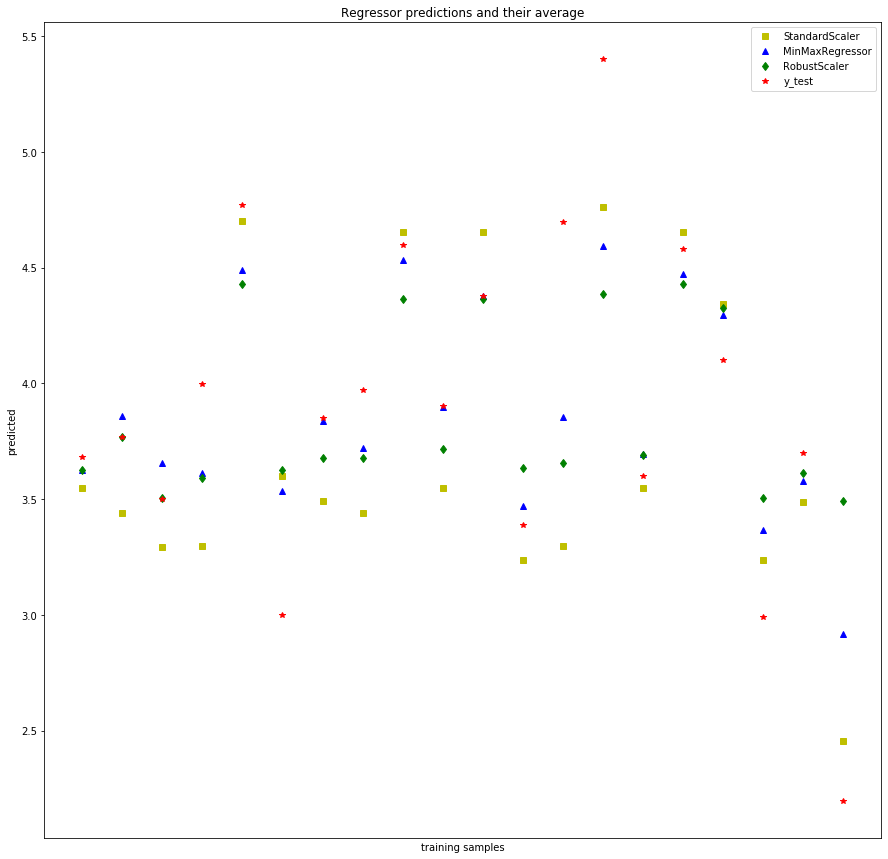

In [39]:
plt.figure(figsize=(15, 15))

plt.plot(pred_search_pipe1[:20], 'ys', label='StandardScaler')
plt.plot(pred_search_pipe2[:20], 'b^', label='MinMaxRegressor')
plt.plot(pred_search_pipe3[:20], 'gd', label='RobustScaler')
plt.plot(y_test[:20], 'r*', label='y_test')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [37]:
pred_search_pipe1

array([3.54943653, 3.43818317, 3.2915804 , 3.29779627, 4.70132937,
       3.59862722, 3.49141613, 3.43818317, 4.65213868, 3.54943653,
       4.65213868, 3.23834744, 3.29779627, 4.7607782 , 3.54943653,
       4.65213868, 4.34259481, 3.23834744, 3.48737386, 2.45317248,
       4.70132937, 3.35538457, 3.41744723, 3.28908335, 3.54682269,
       2.6243584 , 3.70734945, 3.54943653, 3.9687982 , 2.92880357,
       4.65213868, 3.48737386, 3.54943653, 3.23834744, 4.65213868,
       3.91142139, 4.70132937, 4.7607782 , 3.23834744, 3.54943653,
       3.23989266, 2.92880357, 3.48737386, 3.23834744, 3.23989266,
       3.28753813, 2.92880357, 4.70132937, 4.03814964, 3.54943653,
       3.54943653, 4.65213868, 3.43818317, 4.65213868, 3.59862722,
       3.43818317, 4.43382934, 3.59862722, 4.65213868, 3.10447599,
       3.54943653, 3.43818317, 4.65213868, 3.46663792, 4.65213868,
       3.54943653, 4.70537163, 3.34698696, 3.54943653, 4.70132937,
       4.65213868, 3.54943653, 3.23989266, 4.8100516 , 3.28753